#Install library

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 38.9 MB/s 
     |████████████████████████████████| 381 kB 56.9 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.30 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.


#Import library

In [ ]:
from livelossplot import PlotLossesKerasTF
from keras.datasets import mnist
%config Completer.use_jedi = False
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
import tensorflow as tf
#Train the model
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Collect Data

In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train / 255.
X_test  = X_test  / 255.    # standardize the data for train and test to be between 0-1

### Convert Output label to multiple values

In [ ]:
# one hot encoding outcome
target_train = to_categorical(Y_train)
target_test  = to_categorical(Y_test)

# Build the Graph

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Conv2D, Conv2DTranspose, Conv1D, MaxPool2D, Flatten
from tensorflow.keras import Model

In [ ]:
target_train.shape

(60000, 10)

In [ ]:
input_img = Input(shape=(10),
#    batch_size=100,
    name="test",
    dtype=np.float32,
    )

In [ ]:
flatten_input = Dense(900, activation="relu")(input_img)
reshape_input = Reshape((30, 30, 1), input_shape=(900,))(flatten_input)
conv_2d_trans = Conv2DTranspose(128, kernel_size=17, activation='relu')(reshape_input)
conv_2d_trans = Conv2DTranspose(512, kernel_size=13, activation='relu')(conv_2d_trans)
flatten_layer = Flatten()(conv_2d_trans)
decoder       = Dense(784, activation="relu")(flatten_layer)
decoder       = Reshape((28, 28, 1), input_shape=(784,))(decoder)

ResourceExhaustedError: ignored

In [ ]:
decoder_model = Model(input_img, decoder)

In [ ]:
decoder_model.summary()

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 test (InputLayer)           [(None, 10)]              0         
                                                                 
 dense_30 (Dense)            (None, 100)               1100      
                                                                 
 reshape_16 (Reshape)        (None, 10, 10, 1)         0         
                                                                 
 conv2d_transpose_57 (Conv2D  (None, 26, 26, 128)      37120     
 Transpose)                                                      
                                                                 
 conv2d_transpose_58 (Conv2D  (None, 38, 38, 512)      11076096  
 Transpose)                                                      
                                                                 
 flatten_2 (Flatten)         (None, 739328)            0  

In [ ]:
decoder_model.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

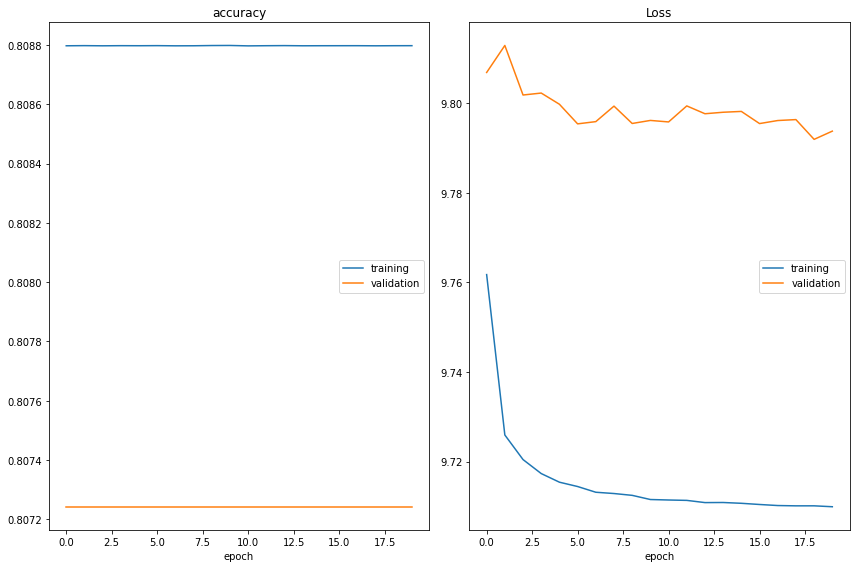

accuracy
	training         	 (min:    0.809, max:    0.809, cur:    0.809)
	validation       	 (min:    0.807, max:    0.807, cur:    0.807)
Loss
	training         	 (min:    9.710, max:    9.762, cur:    9.710)
	validation       	 (min:    9.792, max:    9.813, cur:    9.794)
600/600 [==============================] - 24s 40ms/step - loss: 9.7099 - accuracy: 0.8088 - val_loss: 9.7938 - val_accuracy: 0.8072


In [ ]:
decoder_model.fit(target_train, X_train,
          validation_data=(target_test, X_test),
          epochs=20,
          batch_size=100,
          callbacks=[PlotLossesKerasTF()])

In [ ]:
data_pred = decoder_model.predict(to_categorical(np.arange(10)))

In [ ]:
data_pred.shape

(10, 28, 28, 1)

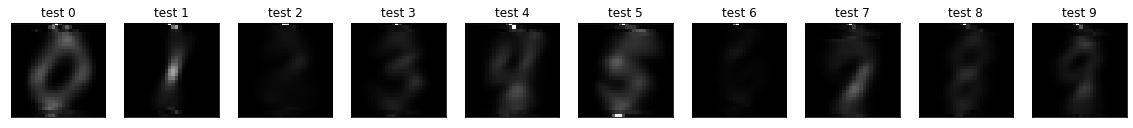

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("test " + str(i))
    plt.imshow(tf.squeeze(data_pred[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)